# 1) Import Library

In [310]:
import pandas as pd
import math
import seaborn as sns
import xgboost as xgb
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

In [311]:
# Install XGBoost
!pip install xgboost

# 2) Mengumpulkan data

In [312]:
data = pd.read_csv('diabetes.csv')

# Menampilkan isi Dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# 3) Menelaah data

**a. Menganalisis Tipe dan Relasi Data**

In [313]:
df = pd.DataFrame(data)

# Menampilkan tipe data setiap kolom
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [314]:
# Menampilkan korelasi antar variabel
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.024118,-0.033523,0.490629,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.048117,0.137246,0.271462,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.159844,-0.002805,0.323235,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.275388,0.115016,0.147077,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.047218,0.130395,0.221721,0.303454
BMI,0.024118,0.048117,0.159844,0.275388,0.047218,1.000000,0.031274,0.123358,0.096973
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.031274,1.000000,0.020434,0.173844
Age,0.490629,0.271462,0.323235,0.147077,0.221721,0.123358,0.020434,1.000000,0.240541
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.096973,0.173844,0.240541,1.000000


**b. Menganalisis Karakteristik Data**

In [315]:
# Menampilkan statistik deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,34.459577,0.471876,33.631510,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,29.371433,0.331329,13.872991,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.700000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,497.000000,2.420000,154.000000,1.000000


In [316]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,34.459577,29.371433,18.200,27.50000,32.3000,36.70000,497.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.631510,13.872991,21.000,24.00000,29.0000,41.00000,154.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [317]:
df.shape

(768, 9)

In [318]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**c. Membuat Laporan Telaah Data**

# 4) Memvalidasi data

In [319]:
# Pengecekan nilai yang hilang per kolom
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values)

# Pengecekan nilai yang hilang per baris
missing_values_per_row = df.isnull().sum(axis=1)
print("\nJumlah nilai yang hilang per baris:")
missing_values_per_row.head()

Jumlah nilai yang hilang per kolom:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Jumlah nilai yang hilang per baris:


0    1
1    1
2    2
3    0
4    0
dtype: int64

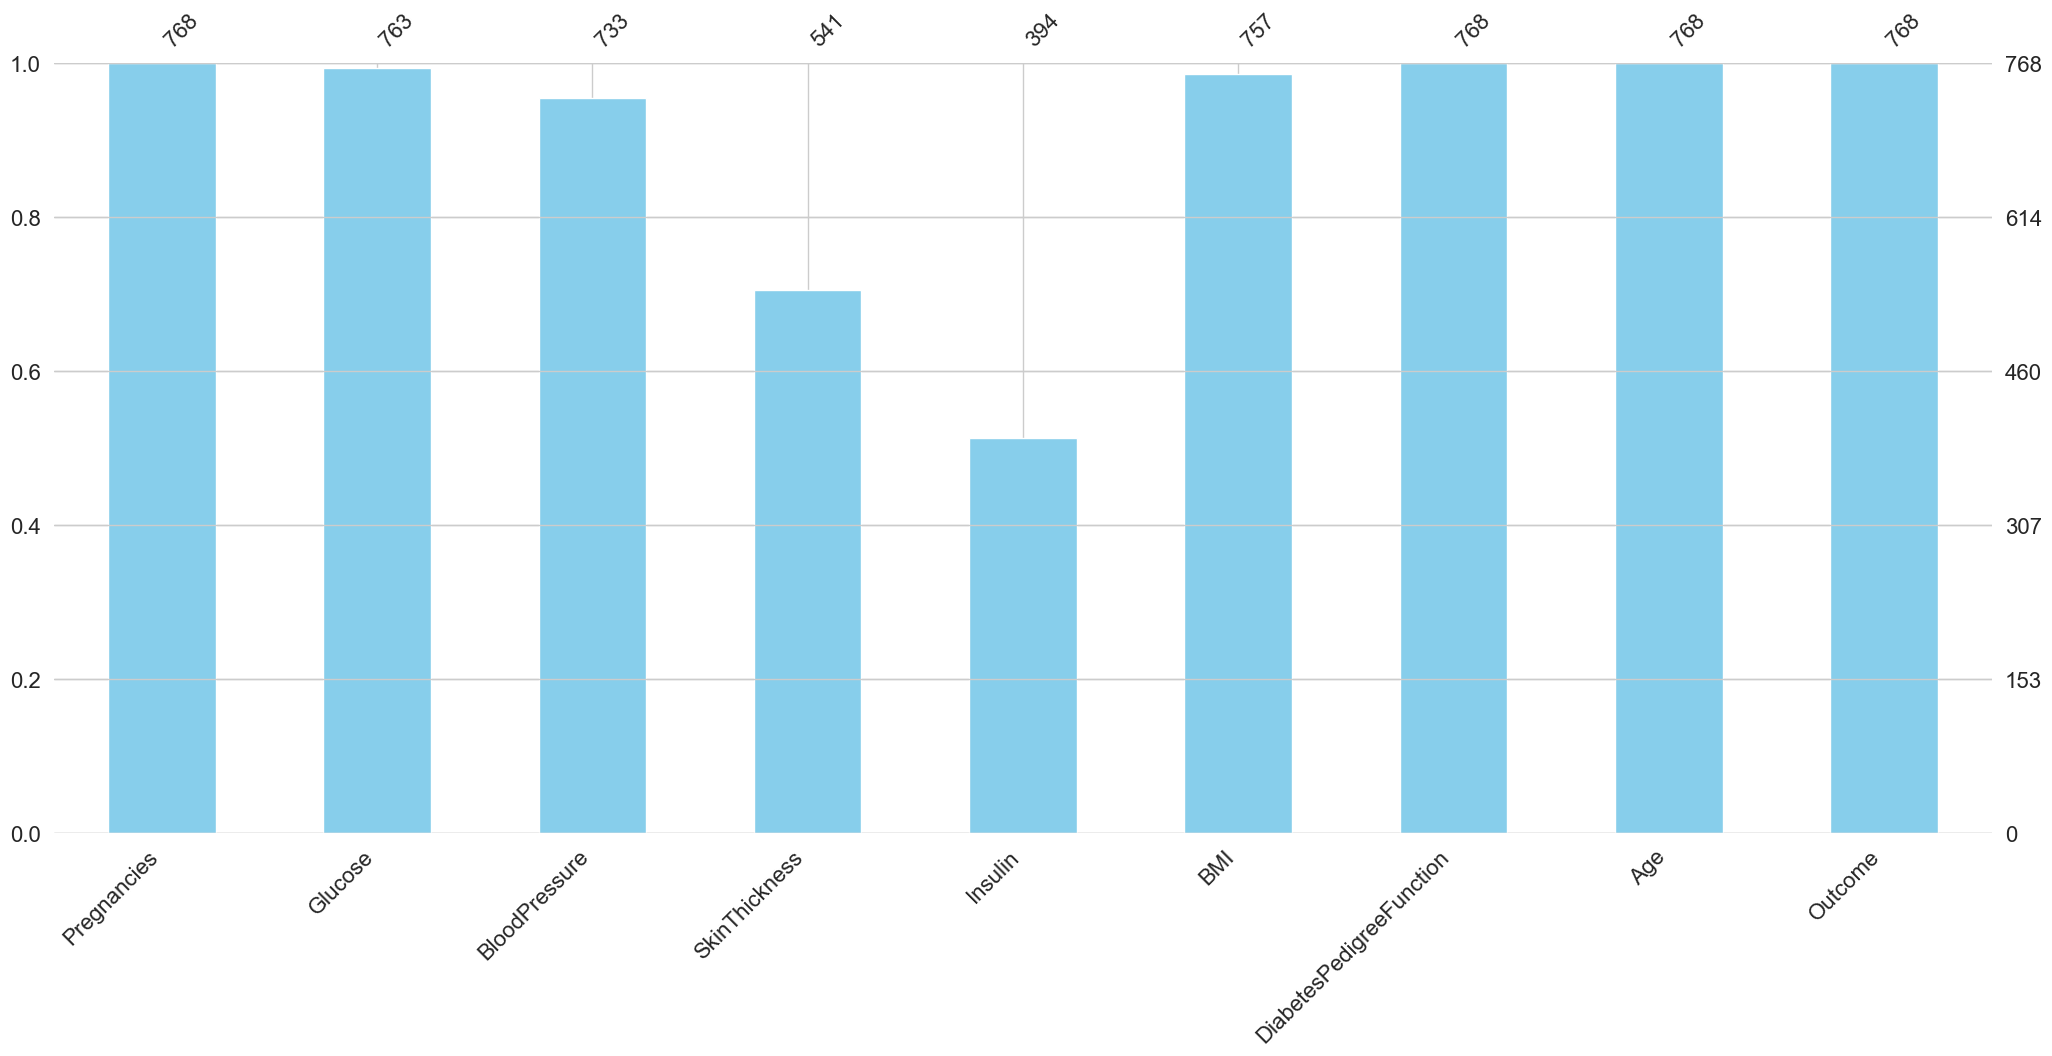

In [320]:
msno.bar(df, color='skyblue');

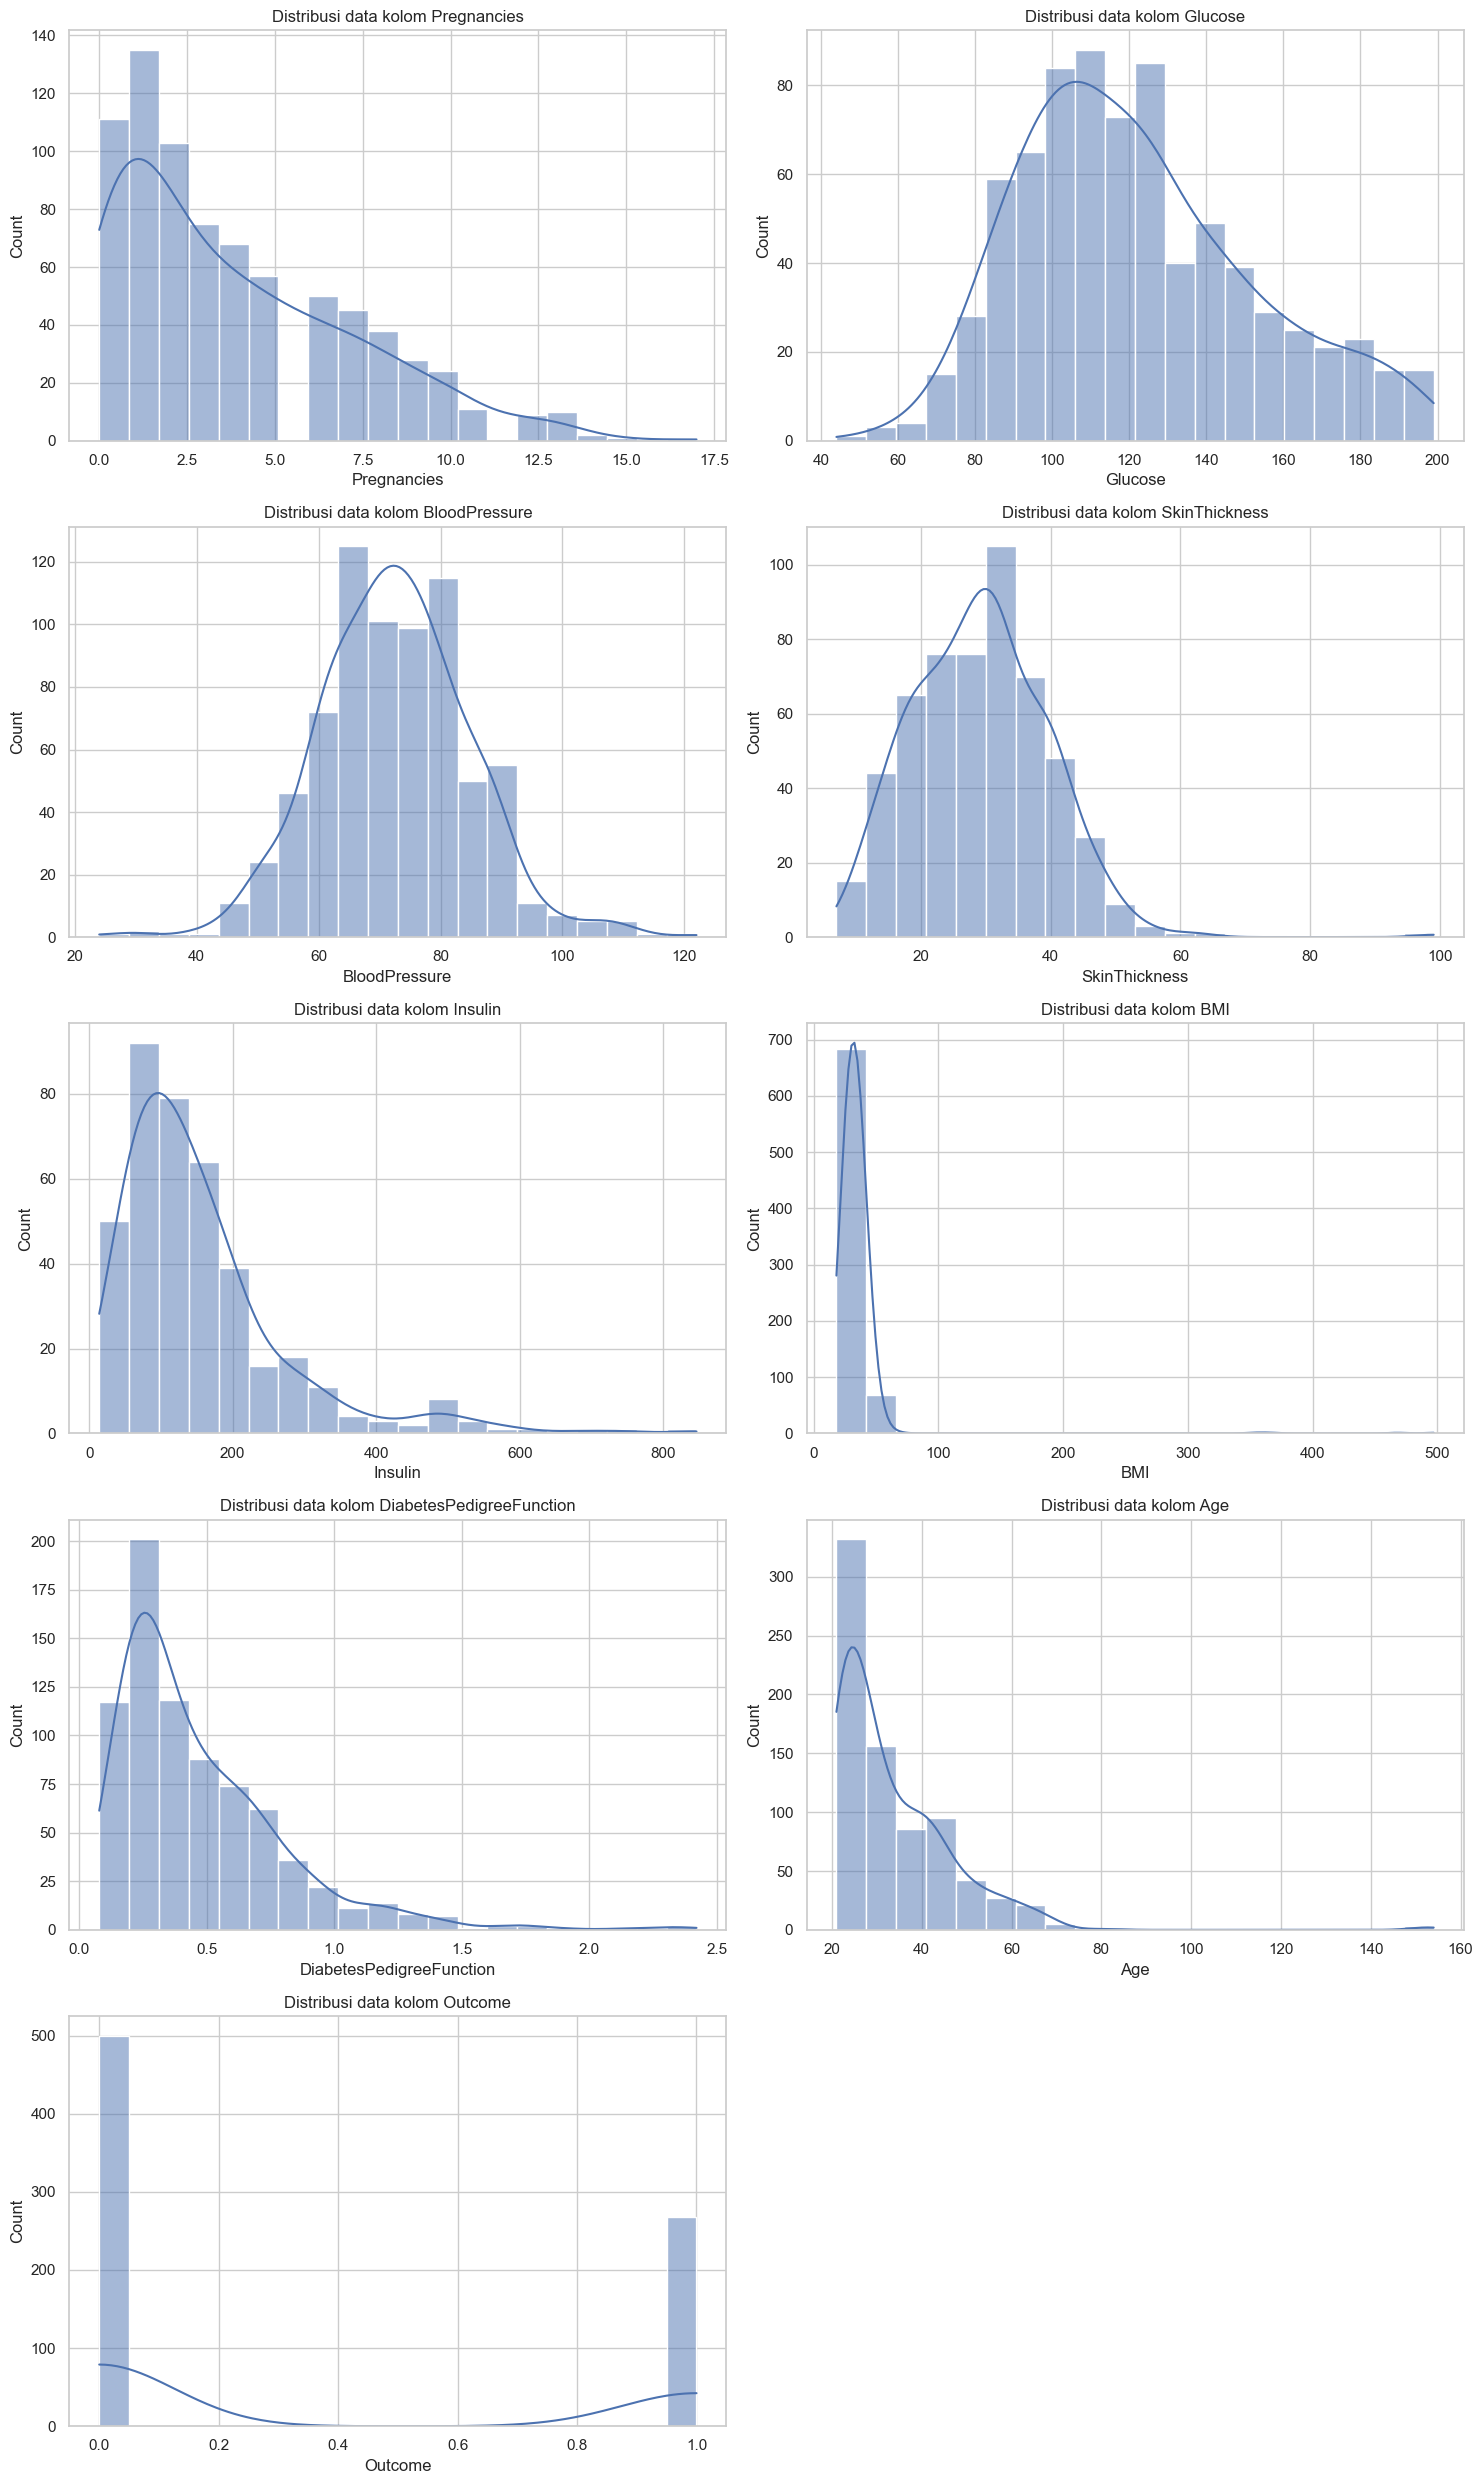

In [321]:
# Atur gaya ke whitegrid
sns.set(style="whitegrid")

# Tentukan jumlah baris dan kolom berdasarkan jumlah kolom dalam DataFrame Anda
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)

# Atur ukuran gambar
plt.figure(figsize=(15, 5 * num_rows))

# Loop melalui kolom-kolom
for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 2, i)

    # Gunakan sns.histplot daripada sns.displot
    sns.histplot(df[column], kde=True, bins=20)

    plt.title(f'Distribusi data kolom {column}')

# Sesuaikan tata letak untuk subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

In [322]:
# Membuat salinan dataset awal (df) ke dalam df_missing_value
df_missing_value = pd.DataFrame(df)

# Membuat objek SimpleImputer dengan strategy 'mean'
imputer_most_frequent = SimpleImputer(strategy='mean')

# Mengisi nilai yang hilang dengan nilai yang paling sering muncul
df_mean = pd.DataFrame(imputer_most_frequent.fit_transform(df_missing_value), columns=df_missing_value.columns)

# Menampilkan DataFrame setelah imputasi
df_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


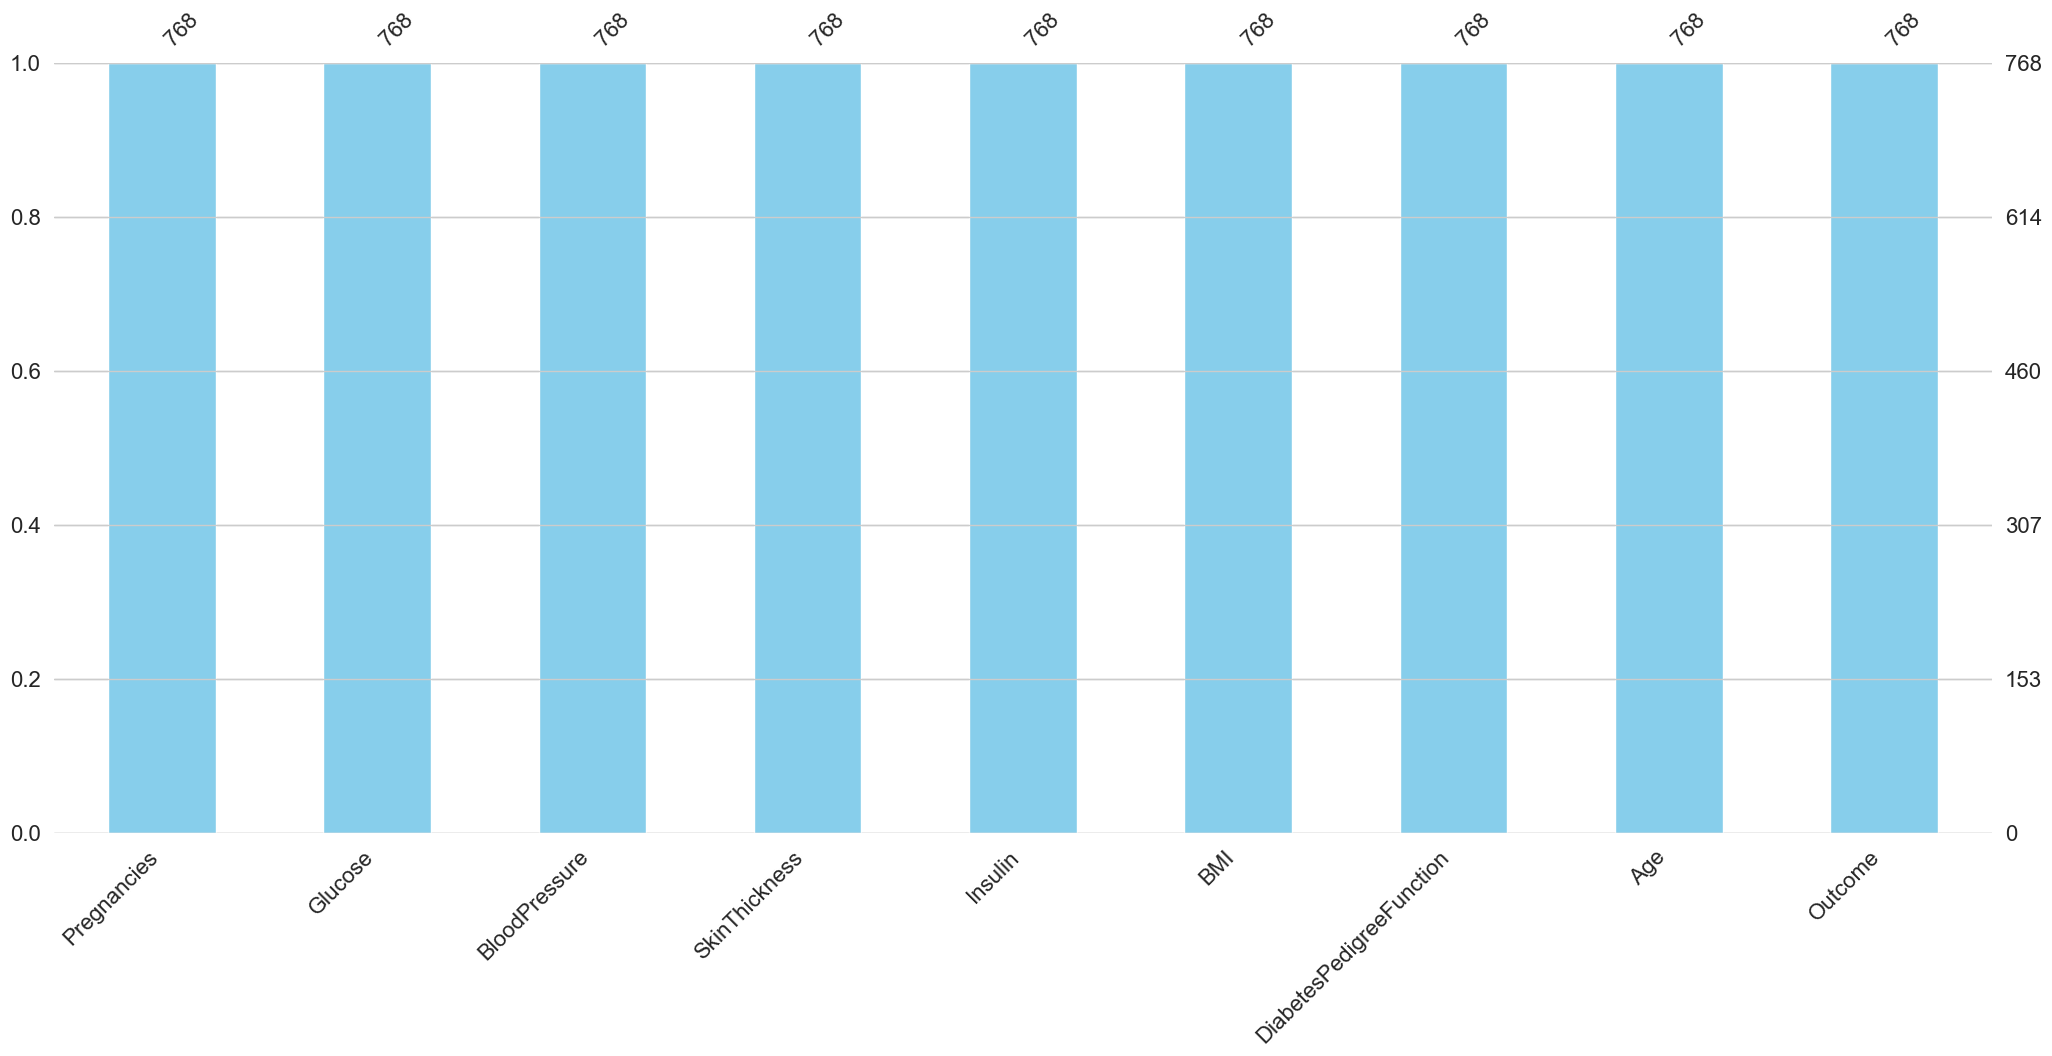

In [323]:
msno.bar(df_mean, color='skyblue');

In [324]:
# Mengubah tipe data ke integer untuk keempat kolom
columns_to_convert = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age', 'Outcome']
df_mean[columns_to_convert] = df_mean[columns_to_convert].astype(int)

# Menampilkan dataset
df_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,29,155,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [325]:
df_mean.dtypes

Pregnancies                   int32
Glucose                       int32
BloodPressure                 int32
SkinThickness                 int32
Insulin                       int32
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int32
Outcome                       int32
dtype: object

# 5) Menentukan objek data

**a. Memutuskan Kriteria dan Teknik Pemilihan Data**

In [326]:
# Pemilihan data berdasarkan kondisi tertentu (contoh: usia di atas 30)
selected_data = df_mean[df_mean['Age'] > 30]

# Menampilkan hasil
print(selected_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      155  33.6   
1            1       85             66             29      155  26.6   
2            8      183             64             29      155  23.3   
4            0      137             40             35      168  43.1   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
4                     2.288   33        1  
8                     0.158  153        1  


**b. Menentukan Attributes (Columns) dan Records (Rows) Data**

In [327]:
# Memilih atribut dan target
selected_features = df_mean[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = df_mean['Outcome']


# Menampilkan hasil
print("Atribut yang dipilih:")
print(selected_features.head())

print("\nKolom target:")
print(target.head())

Atribut yang dipilih:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      155  33.6   
1            1       85             66             29      155  26.6   
2            8      183             64             29      155  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Kolom target:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int32


# 6) Membersihkan data

In [328]:
# Mencari Missing Value sebelum imputasi
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [329]:
# Menampilkan DataFrame sebelum imputasi
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [330]:
# Mencari Missing Value setelah imputasi
df_mean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [331]:
# Menampilkan DataFrame setelah imputasi
df_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,29,155,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [332]:
# Pembersihan data mengecek duplikasi data
duplicated_rows = df_mean[df_mean.duplicated()]

# Menggunakan if-else untuk menampilkan pesan
if not duplicated_rows.empty:
    print("Ada duplikasi dalam dataset. Beberapa baris duplikasi:")
    print(duplicated_rows.head())
else:
    print("Dataset tidak memiliki duplikasi.")

Dataset tidak memiliki duplikasi.


# 7) Mengkonstruksi data

In [333]:
# Data normalization
# Kolom-kolom yang akan dinormalisasi
columns_to_normalize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Normalisasi menggunakan Min-Max Scaling
scaler = MinMaxScaler()
df_mean[columns_to_normalize] = scaler.fit_transform(df_mean[columns_to_normalize])

# Menampilkan hasil
df_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.169471,0.032164,0.234415,0.218045,1
1,0.058824,0.264516,0.428571,0.239130,0.169471,0.017544,0.116567,0.075188,0
2,0.470588,0.896774,0.408163,0.239130,0.169471,0.010652,0.253629,0.082707,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.020677,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.052005,0.943638,0.090226,1


# 8) Menentukan label data

**a. Melakukan Pelabelan Data**

In [334]:
# Menampilkan DataFrame sebelum pelabelan
print("DataFrame Sebelum Pelabelan:")
print(df_mean.head())

# Labeling data
label_column = 'Outcome'  # Kolom yang akan dijadikan label
labels = df_mean[label_column]

# DataFrame setelah pelabelan (tanpa kolom 'Outcome' yang sekarang menjadi label)
df_mean = df_mean.drop(columns=[label_column])

# Menampilkan DataFrame setelah pelabelan
print("\nDataFrame Setelah Pelabelan:")
print(df_mean.head())

# Menampilkan label
print("\nLabel:")
print(labels.head())

DataFrame Sebelum Pelabelan:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.169471  0.032164   
1     0.058824  0.264516       0.428571       0.239130  0.169471  0.017544   
2     0.470588  0.896774       0.408163       0.239130  0.169471  0.010652   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.020677   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.052005   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.218045        1  
1                  0.116567  0.075188        0  
2                  0.253629  0.082707        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.090226        1  

DataFrame Setelah Pelabelan:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.169471  0.032164   
1     0.058824  0.2645

**b. Membuat Laporan Hasil Pelabelan Data**

In [335]:
# Membuat laporan hasil pelabelan data
labeling_report = """
# Laporan Hasil Pelabelan Data

## Statistik Deskriptif
Jumlah Observasi: {}
Jumlah Kelas: {}
Distribusi Kelas:
{}
""".format(len(labels), labels.nunique(), labels.value_counts())

# Menampilkan laporan
print(labeling_report)


# Laporan Hasil Pelabelan Data

## Statistik Deskriptif
Jumlah Observasi: 768
Jumlah Kelas: 2
Distribusi Kelas:
Outcome
0    500
1    268
Name: count, dtype: int64



# 9) Membangun model

**a. Menyiapkan Parameter Model**

In [336]:
# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df_mean, labels, test_size=0.2, random_state=42)

**b. Menggunakan Tools Pemodelan**

Decision Tree Accuracy: 0.7142857142857143
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



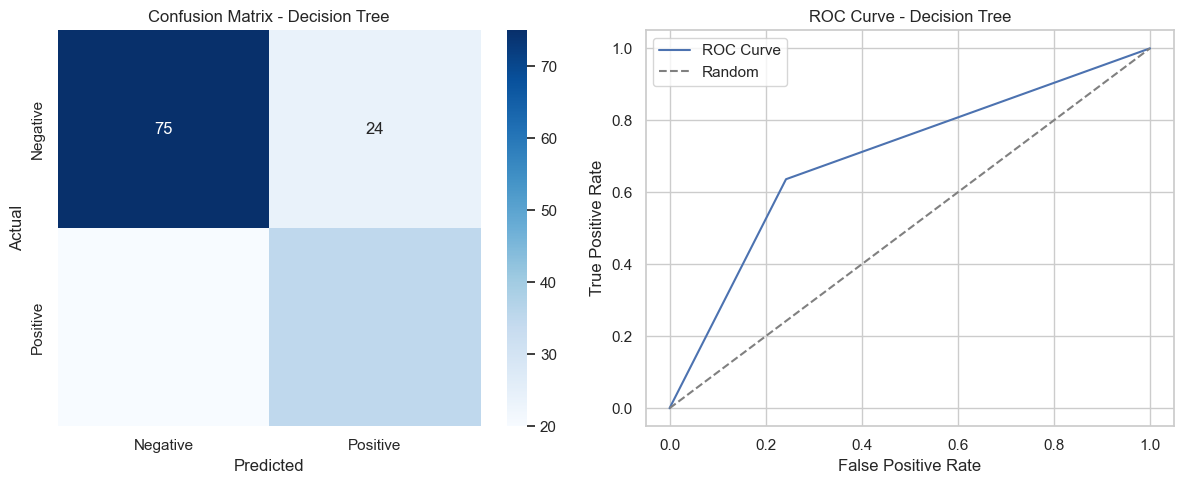

In [337]:
# Inisialisasi model DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
# Melatih model
dt.fit(X_train, y_train)
# Melakukan prediksi pada data uji
dt_pred = dt.predict(X_test)
# Mengukur akurasi model
dt_accuracy = accuracy_score(y_test, dt_pred)

# Menampilkan hasil evaluasi
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report (Decision Tree):\n", classification_report(y_test, dt_pred))

# Decision Tree predictions and probabilities
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, dt_pred)

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, dt_pred_proba[:, 1])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Decision Tree')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
axes[1].plot(fpr, tpr, label='ROC Curve')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
axes[1].set_title('ROC Curve - Decision Tree')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

Random Forest Accuracy: 0.7597402597402597
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



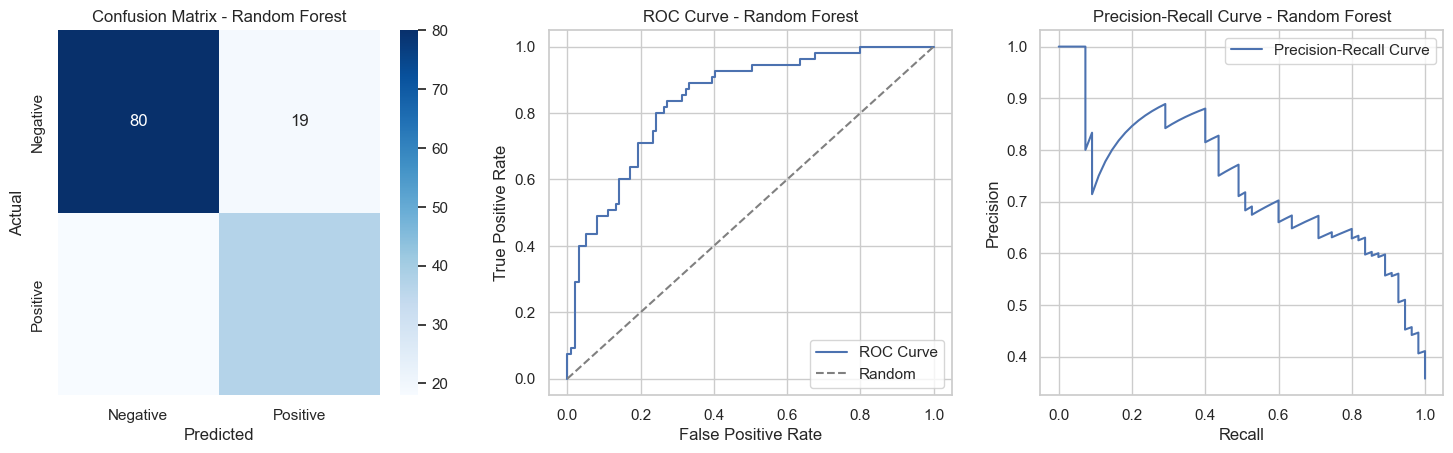

In [338]:
# Inisialisasi model RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Melatih model
rf.fit(X_train, y_train)

# Melakukan prediksi pada data uji
rf_pred = rf.predict(X_test)

# Mengukur akurasi model
rf_accuracy = accuracy_score(y_test, rf_pred)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_pred))

# Random Forest predictions and probabilities
rf_pred_proba = rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, rf_pred_proba)

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, rf_pred_proba)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
axes[1].plot(fpr, tpr, label='ROC Curve')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
axes[1].set_title('ROC Curve - Random Forest')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

# Precision-Recall Curve
axes[2].plot(recall, precision, label='Precision-Recall Curve')
axes[2].set_title('Precision-Recall Curve - Random Forest')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].legend()

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

SVC Accuracy: 0.7727272727272727
Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



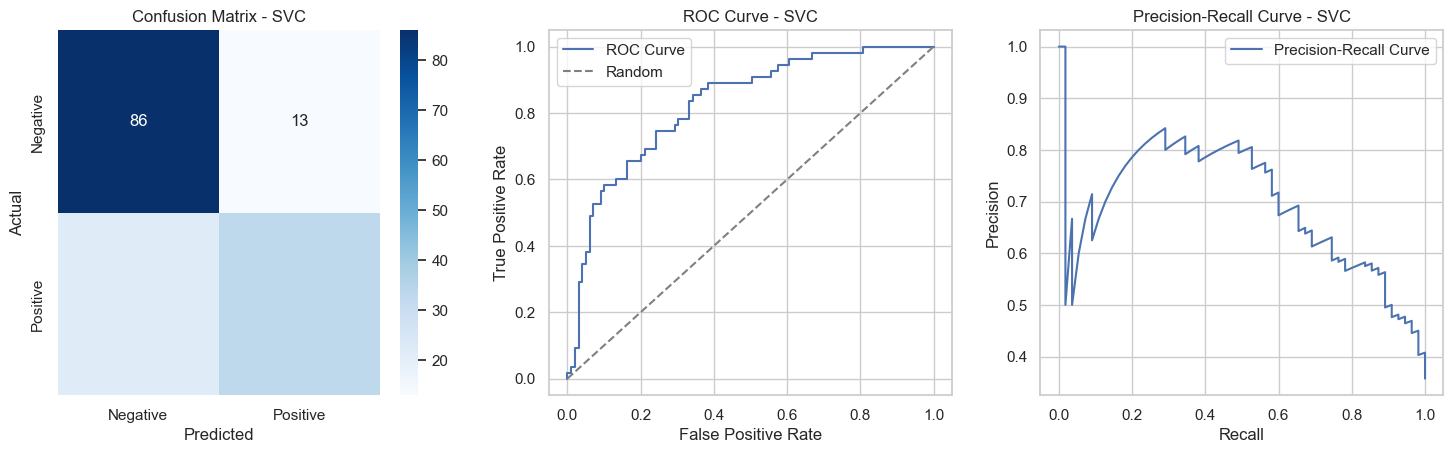

In [339]:
# Inisialisasi model SVC
svc = SVC(kernel='linear', random_state=42)  # Pilih kernel yang sesuai dengan kebutuhan

# Melatih model
svc.fit(X_train, y_train)

# Melakukan prediksi pada data uji
svc_pred = svc.predict(X_test)

# Mengukur akurasi model
svc_accuracy = accuracy_score(y_test, svc_pred)

# Menampilkan hasil evaluasi
print("SVC Accuracy:", svc_accuracy)
print("Classification Report (SVC):\n", classification_report(y_test, svc_pred))

# SVC predictions and decision function
svc_pred = svc.predict(X_test)
svc_decision = svc.decision_function(X_test)

# Confusion Matrix
cm_svc = confusion_matrix(y_test, svc_pred)

# ROC Curve
fpr_svc, tpr_svc, thresholds_roc_svc = roc_curve(y_test, svc_decision)

# Precision-Recall Curve
precision_svc, recall_svc, thresholds_pr_svc = precision_recall_curve(y_test, svc_decision)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix - SVC')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
axes[1].plot(fpr_svc, tpr_svc, label='ROC Curve')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
axes[1].set_title('ROC Curve - SVC')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

# Precision-Recall Curve
axes[2].plot(recall_svc, precision_svc, label='Precision-Recall Curve')
axes[2].set_title('Precision-Recall Curve - SVC')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].legend()

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

KNN Accuracy: 0.7857142857142857
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.79      0.91      0.85        99
           1       0.78      0.56      0.65        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



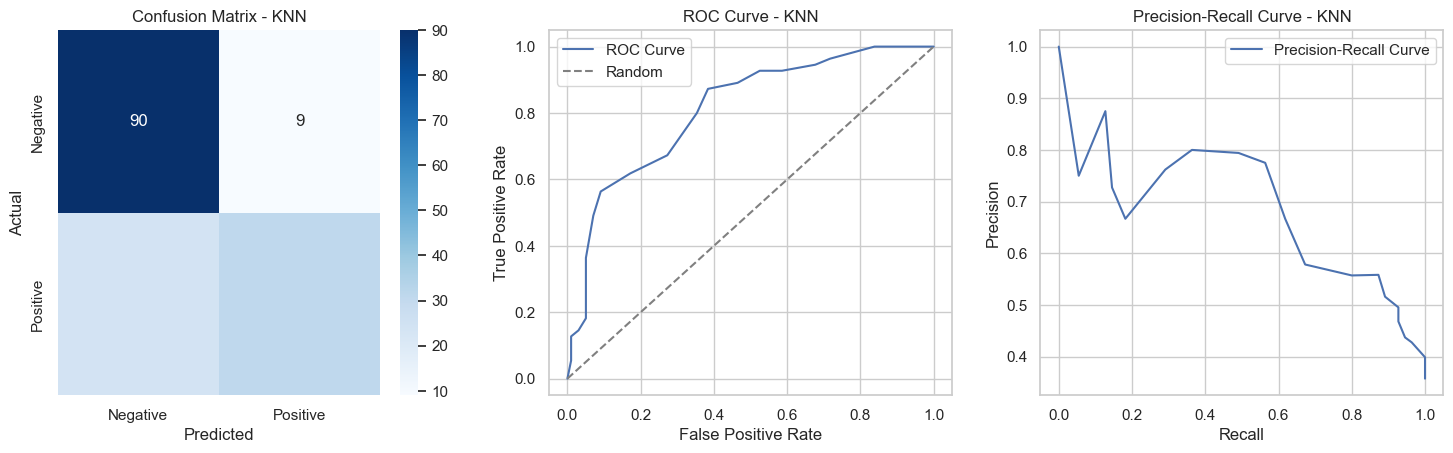

In [340]:
# Inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=20)  # Pilih jumlah tetangga yang sesuai dengan kebutuhan

# Melatih model
knn.fit(X_train, y_train)

# Melakukan prediksi pada data uji
knn_pred = knn.predict(X_test)

# Mengukur akurasi model
knn_accuracy = accuracy_score(y_test, knn_pred)

# Menampilkan hasil evaluasi
print("KNN Accuracy:", knn_accuracy)
print("Classification Report (KNN):\n", classification_report(y_test, knn_pred))

# KNN predictions and probabilities
knn_pred_proba = knn.predict_proba(X_test)[:, 1]
knn_pred = knn.predict(X_test)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_pred)

# ROC Curve
fpr_knn, tpr_knn, thresholds_roc_knn = roc_curve(y_test, knn_pred_proba)

# Precision-Recall Curve
precision_knn, recall_knn, thresholds_pr_knn = precision_recall_curve(y_test, knn_pred_proba)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix - KNN')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
axes[1].plot(fpr_knn, tpr_knn, label='ROC Curve')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
axes[1].set_title('ROC Curve - KNN')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

# Precision-Recall Curve
axes[2].plot(recall_knn, precision_knn, label='Precision-Recall Curve')
axes[2].set_title('Precision-Recall Curve - KNN')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].legend()

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

Naive Bayes Accuracy: 0.7272727272727273
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



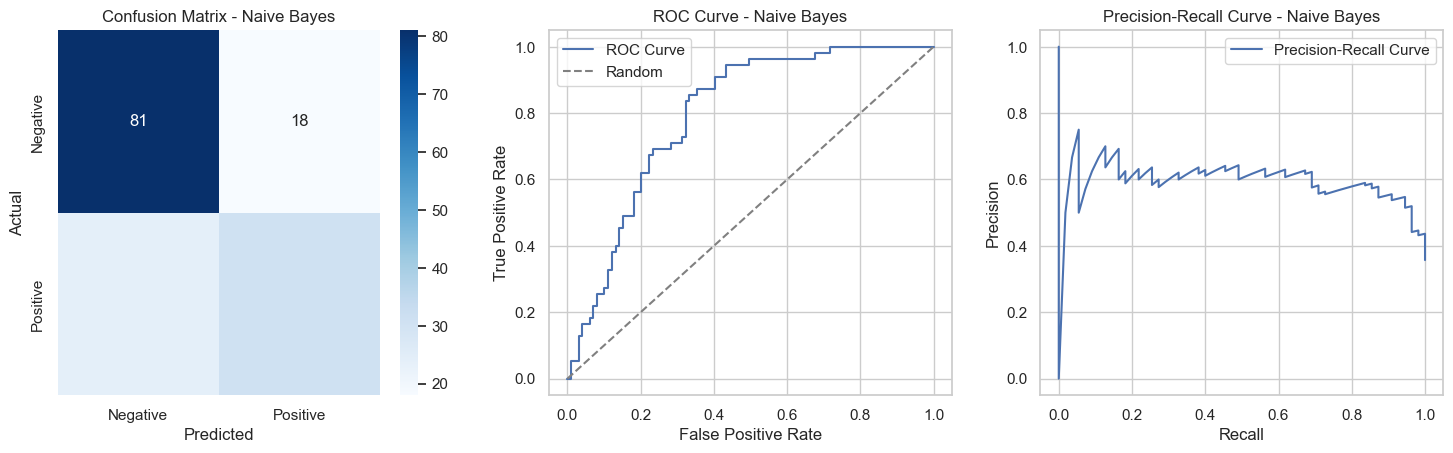

In [341]:
# Inisialisasi model Naive Bayes
naive_bayes = GaussianNB()

# Melatih model
naive_bayes.fit(X_train, y_train)

# Melakukan prediksi pada data uji
nb_pred = naive_bayes.predict(X_test)

# Mengukur akurasi model
nb_accuracy = accuracy_score(y_test, nb_pred)

# Menampilkan hasil evaluasi
print("Naive Bayes Accuracy:", nb_accuracy)
print("Classification Report (Naive Bayes):\n", classification_report(y_test, nb_pred))

# Naive Bayes predictions and probabilities
naive_bayes_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]
naive_bayes_pred = naive_bayes.predict(X_test)

# Confusion Matrix
cm_naive_bayes = confusion_matrix(y_test, naive_bayes_pred)

# ROC Curve
fpr_naive_bayes, tpr_naive_bayes, thresholds_roc_naive_bayes = roc_curve(y_test, naive_bayes_pred_proba)

# Precision-Recall Curve
precision_naive_bayes, recall_naive_bayes, thresholds_pr_naive_bayes = precision_recall_curve(y_test, naive_bayes_pred_proba)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(cm_naive_bayes, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Naive Bayes')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
axes[1].plot(fpr_naive_bayes, tpr_naive_bayes, label='ROC Curve')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
axes[1].set_title('ROC Curve - Naive Bayes')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

# Precision-Recall Curve
axes[2].plot(recall_naive_bayes, precision_naive_bayes, label='Precision-Recall Curve')
axes[2].set_title('Precision-Recall Curve - Naive Bayes')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].legend()

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

Akurasi Regresi Logistik: 0.7532467532467533
Laporan Klasifikasi (Regresi Logistik):
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



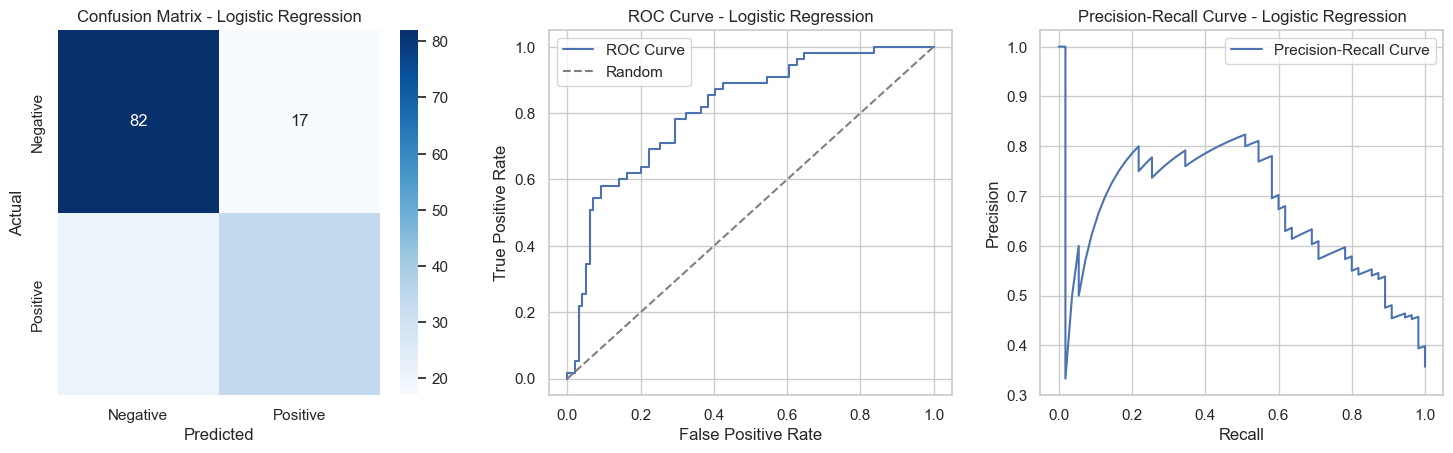

In [342]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mengubah X_train_scaled dan X_test_scaled menjadi DataFrame dengan nama fitur
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

logreg = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Melatih model dengan memberikan nama fitur
logreg.fit(X_train_scaled_df, y_train)

# Melakukan prediksi pada set uji
logreg_pred = logreg.predict(X_test_scaled_df)

# Menghitung akurasi
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Menampilkan hasil evaluasi
print("Akurasi Regresi Logistik:", logreg_accuracy)
print("Laporan Klasifikasi (Regresi Logistik):\n", classification_report(y_test, logreg_pred))

# Logistic Regression predictions and probabilities
logreg_pred_proba = logreg.predict_proba(X_test_scaled_df)[:, 1]
logreg_pred = logreg.predict(X_test_scaled_df)

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, logreg_pred)

# ROC Curve
fpr_logreg, tpr_logreg, thresholds_roc_logreg = roc_curve(y_test, logreg_pred_proba)

# Precision-Recall Curve
precision_logreg, recall_logreg, thresholds_pr_logreg = precision_recall_curve(y_test, logreg_pred_proba)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
axes[1].plot(fpr_logreg, tpr_logreg, label='ROC Curve')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
axes[1].set_title('ROC Curve - Logistic Regression')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

# Precision-Recall Curve
axes[2].plot(recall_logreg, precision_logreg, label='Precision-Recall Curve')
axes[2].set_title('Precision-Recall Curve - Logistic Regression')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].legend()

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

Akurasi XGBoost: 0.7012987012987013
Laporan Klasifikasi (XGBoost):
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        99
           1       0.57      0.65      0.61        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.71       154



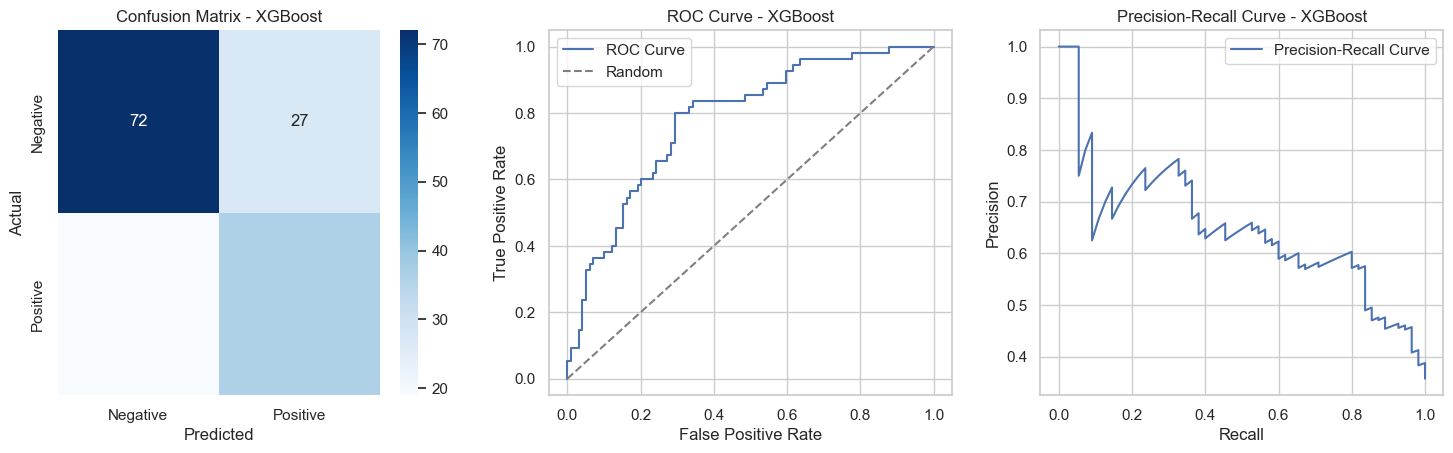

In [343]:
# Skala fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Melatih model XGBoost
xgb_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set uji
xgb_pred = xgb_model.predict(X_test_scaled)

# Menghitung akurasi
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Menampilkan hasil evaluasi
print("Akurasi XGBoost:", xgb_accuracy)
print("Laporan Klasifikasi (XGBoost):\n", classification_report(y_test, xgb_pred))

# Skala fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Melatih model XGBoost
xgb_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set uji
xgb_pred = xgb_model.predict(X_test_scaled)

# Menghitung probabilitas prediksi positif untuk kurva ROC dan PR
xgb_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_pred)

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_roc_xgb = roc_curve(y_test, xgb_pred_proba)

# Precision-Recall Curve
precision_xgb, recall_xgb, thresholds_pr_xgb = precision_recall_curve(y_test, xgb_pred_proba)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix - XGBoost')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
axes[1].plot(fpr_xgb, tpr_xgb, label='ROC Curve')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
axes[1].set_title('ROC Curve - XGBoost')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

# Precision-Recall Curve
axes[2].plot(recall_xgb, precision_xgb, label='Precision-Recall Curve')
axes[2].set_title('Precision-Recall Curve - XGBoost')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].legend()

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()